In [1]:
#For using Pandas Dataframe
import pandas as pd

#For using Numerical computation
import numpy as np

#For using Plotting, Graphics
import matplotlib.pyplot as plt
import seaborn as sns

#To Detect Multicollinearity importing Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For using Normalization and Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

#For Using Metrics Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#For Using Data Splitting for Train and Test Data Preparation
from sklearn.model_selection import train_test_split

#For applying Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier


# For Normalization
from sklearn.preprocessing import MinMaxScaler

# For Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
df = pd.read_csv('wine_dataset.csv')

In [3]:
df.shape

(6497, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Exploratory Data Analysis

In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Proportional Presentation of Style 

In [7]:
df['style'].value_counts(normalize=True)

white    0.753886
red      0.246114
Name: style, dtype: float64

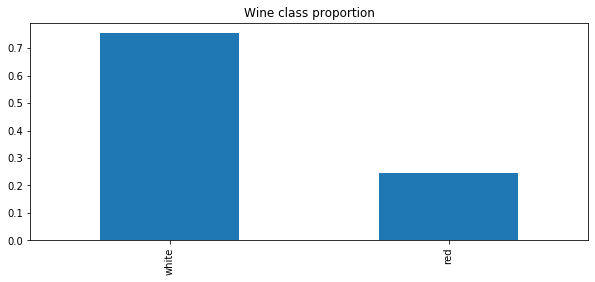

In [8]:
#Graphical Representation of Wine Style Feature

data =df['style'].value_counts(normalize=True)
data.plot(kind='bar',figsize=(10,4))
plt.title("Wine class proportion",fontsize= 12)
plt.show()

# Correlation 

In [9]:
#Correlation of Numerical Features

df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


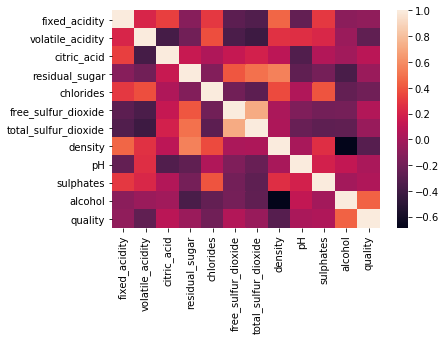

In [10]:
sns.heatmap(df.corr())

# Examining Multicollinearity  through Variation Inflation Factor

In [11]:
def calc_vif(Z):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = Z.columns
    vif["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]

    return(vif)

In [12]:
Z = df.iloc[:,:-1]
calc_vif(Z)

,variables,VIF
0,fixed_acidity,58.907356
1,volatile_acidity,9.502423
2,citric_acid,9.343181
3,residual_sugar,3.623418
4,chlorides,5.580536
5,free_sulfur_dioxide,8.534873
6,total_sulfur_dioxide,14.886028
7,density,943.737171
8,pH,589.521304
9,sulphates,18.722063


From the above table we can see that VIF is very high for Columns like Density,pH,Alcohol.
VIF >10 is considered to be High Multicollinearity. 
In real scenario's we will drop the columns having high VIF to avoid Multicollinearity.

# Grouped statistics for both classes of Wine

In [13]:
df.groupby(['style']).mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
style,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


It seems that in average, red wine usually is less acid than white wine (pH is more for red wine compared to white wine) (the opposite is true when we look at volatile_acidity feature). 
The 'residual_sugar' in average is almost 3 times bigger for a white wine. The feature 'free_sulfur_dioxide' is highly and positive correlated with `total_sulfur_dioxide', which kind of makes sense.

# Lets check the Unique Values of Quality Field

In [14]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

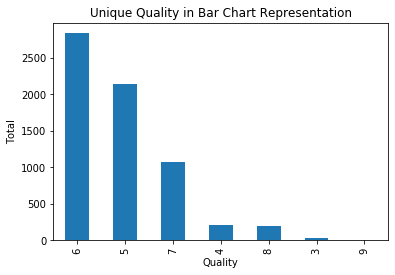

In [15]:
df['quality'].value_counts().plot(kind='bar')

plt.xlabel("Quality")
plt.ylabel("Total")
plt.title("Unique Quality in Bar Chart Representation")
plt.show()

# Mean Value representation of Each Quality of the Wine

In [16]:
df.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


# Correlation of Individual Quality 

# Quality Group - 3

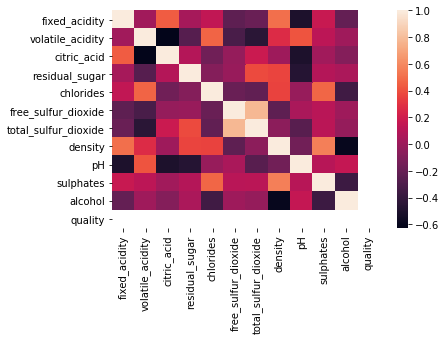

In [17]:
sns.heatmap(df.groupby(["quality"]).get_group(3).corr())

# Quality Group - 4

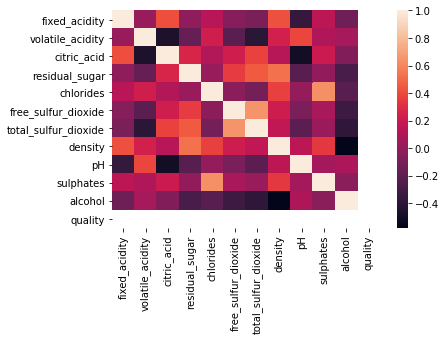

In [18]:
sns.heatmap(df.groupby(["quality"]).get_group(4).corr())

# Quality Group - 5

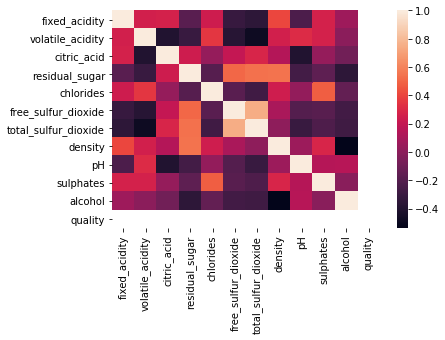

In [19]:
sns.heatmap(df.groupby(["quality"]).get_group(5).corr())

# Quality Group - 6

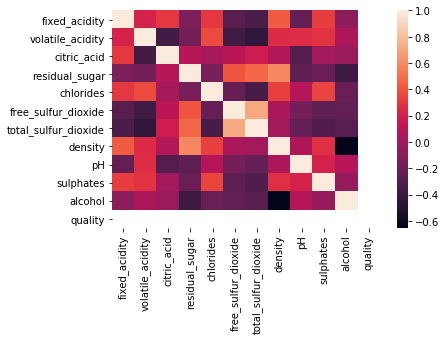

In [20]:
sns.heatmap(df.groupby(["quality"]).get_group(6).corr())

# Quality Group - 7

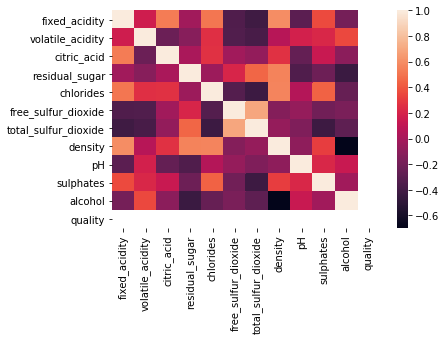

In [21]:
sns.heatmap(df.groupby(["quality"]).get_group(7).corr())

# Quality Group - 8

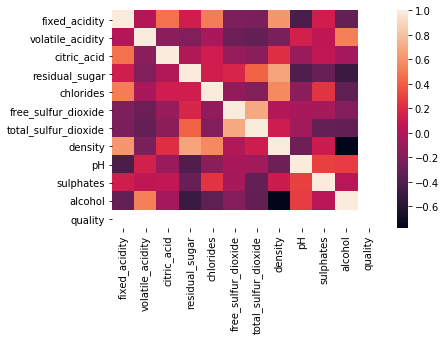

In [22]:
sns.heatmap(df.groupby(["quality"]).get_group(8).corr())

# Quality Group - 9

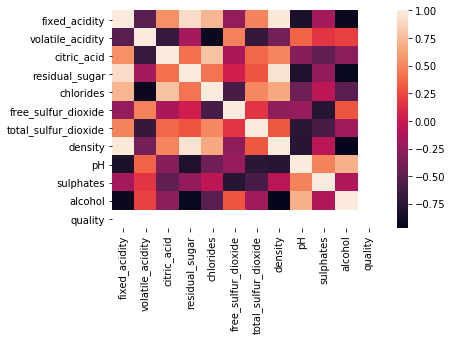

In [23]:
sns.heatmap(df.groupby(["quality"]).get_group(9).corr())

# Preparing Target Columns

In [24]:
df.drop(['style','pH','density'], axis = 1,inplace=True)

'pH' and 'density' columns are dropped due to very high VIF.

In [25]:
df.shape

(6497, 10)

In [26]:
x = df.drop('quality', axis=1)
y = df['quality']

In [27]:
x.shape

(6497, 9)

In [28]:
y.shape

(6497,)

# Histogram representation of Target colum - Quality

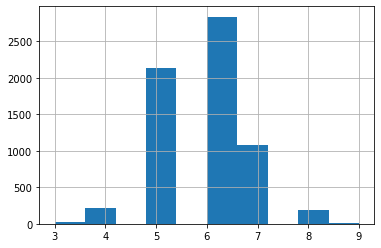

In [29]:
hist = y.hist(bins=10)

# Lets check the Data Distribution of Numerical Columns

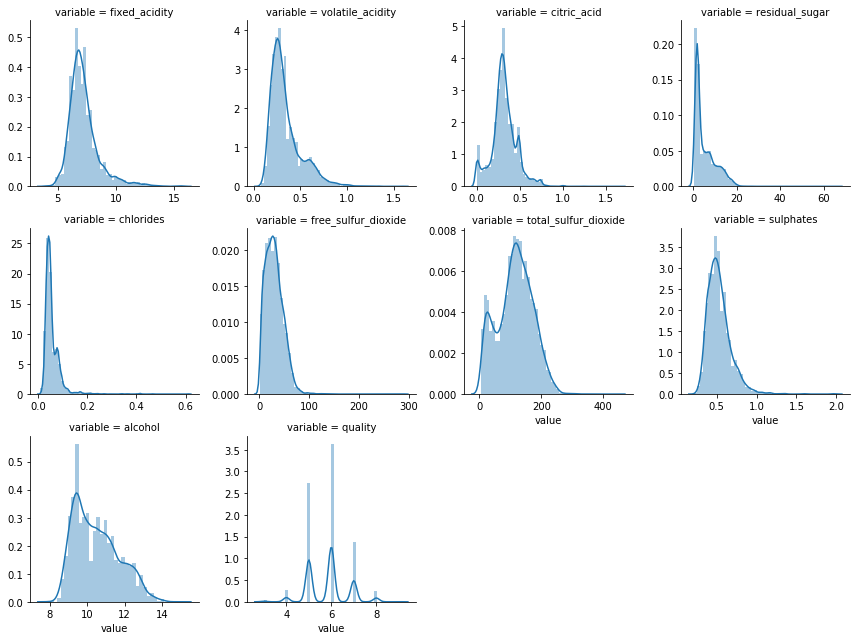

In [30]:
num = [f for f in df.columns if df.dtypes[f]!='object']
nd = pd.melt(df,value_vars = num)
n1 =sns.FacetGrid(nd,col='variable',col_wrap =4,sharex=False,sharey=False)
n1=n1.map(sns.distplot,'value')
n1

# Feature Selection

# Selecting the Best features (Ascending Order) as all are numerical variables so we are applying Chi Square Method

In [31]:
bestfeatures=SelectKBest(score_func=chi2, k=9)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
#concatenate two dataframes
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))

                  Specs        Score
6  total_sulfur_dioxide  1269.974108
5   free_sulfur_dioxide   913.332832
3        residual_sugar   225.657151
8               alcohol   201.369195
1      volatile_acidity    42.528980
0         fixed_acidity    11.115118
4             chlorides     6.388650
2           citric_acid     3.673977
7             sulphates     1.078473


As this is a test and number of features(11) are less, I am considering all the features

# Applying the Model and Evaluation Metrics 

In [32]:
# Perform Test/Train Split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3,random_state=11)

In [33]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
#Train Model
wine_quality_model = RandomForestClassifier(n_estimators=128)
wine_quality_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=128)

In [35]:
#Predict 
y_pred = wine_quality_model.predict(x_test)


In [36]:
#Evaluate Model: Confusion Matrix

cmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:") 
print(cmatrix)

Confusion Matrix:
[[  0   0   6   1   0   0]
 [  1   4  41  15   0   0]
 [  0   4 470 173   6   0]
 [  0   1 144 679  39   0]
 [  0   0   8 156 147   4]
 [  0   0   0  19  16  16]]


In [37]:
#Overall Accuracy, Precision_score and Recall
from sklearn.metrics import precision_score, recall_score, accuracy_score


precision_metric = precision_score(y_test, y_pred, average = "macro")
recall_metric = recall_score(y_test, y_pred, average = "macro")
accuracy_metric = accuracy_score(y_test, y_pred)



print('Precision score: {0:0.4f}'.format(precision_metric))
print('Recall score: {0:0.4f}'.format(recall_metric))
print('Accuracy score: {0:0.4f}'.format(accuracy_metric))

Precision score: 0.5508
Recall score: 0.3921
Accuracy score: 0.6749


In [38]:
#Evaluate Model: Classification Report

print("Classification Report:") 
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.44      0.07      0.11        61
           5       0.70      0.72      0.71       653
           6       0.65      0.79      0.71       863
           7       0.71      0.47      0.56       315
           8       0.80      0.31      0.45        51

    accuracy                           0.67      1950
   macro avg       0.55      0.39      0.43      1950
weighted avg       0.67      0.67      0.66      1950

